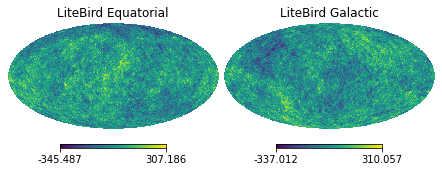

In [5]:
import numpy as np
import healpy as hp
import pylab as pl

try:
    import maps
    import utils_cmb
except:
    import sys #
    if '..' not in sys.path:
        sys.path.insert(0, '..')
    import maps
    import utils_cmb

# Example getting a LiteBird map:

simulation_index = 0 # there are 500 sims from 0 to 499
litebird_band = 'L1-060'
T = maps.get_lb_map(litebird_band, simulation_index, job='T',coord=None) # Other 'jobs' can be 'QU' or 'TQU'
T_gal = maps.get_lb_map(litebird_band, simulation_index, job='T', coord=['C','G']) # Galactic coordinates
hp.mollview(T[0],sub=(1,2,1),title='LiteBird Equatorial')
hp.mollview(T_gal[0],sub=(1,2,2),title='LiteBird Galactic')

In [3]:
# Possible band inputs are:
print('List of LiteBird bands:')
print(maps.lb['tag'])

print('List of S4 bands:')
print(maps.s4['band'])

List of LiteBird bands:
 tag  
------
H3-402
H2-337
H1-280
H2-235
H1-195
M1-195
M2-166
M1-140
M2-119
M1-100
L4-140
L3-119
L4-100
L2-089
L3-089
L1-078
L4-078
L2-068
L3-068
L1-060
L2-050
L1-040
List of S4 bands:
   band   
----------
SPLAT_f020
CHLAT_f030
SPLAT_f030
CHLAT_f040
SPLAT_f040
SPLAT_f090
CHLAT_f090
CHLAT_f150
SPLAT_f150
CHLAT_f220
SPLAT_f220
CHLAT_f280
SPLAT_f280
  SAT_f030
  SAT_f040
  SAT_f085
  SAT_f095
  SAT_f145
  SAT_f155
  SAT_f220
  SAT_f280


In [ ]:
# Same for a S4 map:
band = 'SPLAT_f150'
lmax = 3000
job = 'TQU'
simulation_index = 0 # there are 500 sims from 0 to 499


TQU = maps.get_s4_map(band, simulation_index, job=job)

ls = np.arange(2, lmax + 1)

_, cl_len,_ = utils_cmb.get_cls()  # NB the lensed Cls here are the predictions without the cut at lmax 5120

if 'T' in job:
    T = hp.map2alm(TQU[0], lmax=lmax, iter=0)
    pl.loglog(ls, hp.alm2cl(T)[ls], label='TT')
    pl.plot(ls, cl_len['tt'][ls], c='k')

if 'QU' in job:
    EB = hp.map2alm_spin(TQU[1:], 2, lmax)

    pl.loglog(ls, hp.alm2cl(EB)[0][ls], label='EE')
    pl.loglog(ls, hp.alm2cl(EB)[1][ls], label='BB')
    pl.plot(ls, cl_len['ee'][ls], c='k')
    pl.plot(ls, cl_len['bb'][ls], c='k')

pl.title(band)
pl.legend()